In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path.append('/nethome/jbang36/eko')


In [3]:
### let's run the experiment and get the results

video_name = 'dashcam960'

from eko_paper2022.motivation.main import *

images = load_dataset(video_name)


10-31-2022 12:50:43 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/dashcam960/video.mp4 is (74880, 540, 960, 3)
meta data of the video /srv/data/jbang36/video_data/dashcam960/video.mp4 is (74880, 540, 960, 3)
100%|██████████| 74880/74880 [01:26<00:00, 863.98it/s]


In [4]:
percentages = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

from eko_paper2022.experiments.main import *


In [5]:
### okay, run all the ekos for the percentages....

In [6]:
thr = 1 / 140

In [7]:
import time

ekos = []
index_construction_times = []
anchor_count = int( len(images) * 0.1 )
anchor_percentage = 0.5
for percentage in percentages:
    st = time.perf_counter()
    print('>>>>>', percentage)
    index = execute_ekoalt_rq4(images, video_name, anchor_percentage = anchor_percentage, nb_buckets = anchor_count, exploit_ratio = percentage)
    ekos.append(index)
    index_construction_times.append(time.perf_counter() - st + anchor_count * anchor_percentage * thr)
    
    
    

>>>>> 0
index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
0.5 7488
rep indices stats 7488 3744
3745 7488
bucketing complete!


Target DNN Invocations:   0%|          | 0/3745 [00:00<?, ?it/s]

>>>>> 0.2
index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
0.5 7488
rep indices stats 7488 3744
3745 7488
bucketing complete!


Target DNN Invocations:   0%|          | 0/3745 [00:00<?, ?it/s]

>>>>> 0.4
index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
0.5 7488
rep indices stats 7488 3744
3745 7488
bucketing complete!


Target DNN Invocations:   0%|          | 0/3745 [00:00<?, ?it/s]

>>>>> 0.6
index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
0.5 7488
rep indices stats 7488 3744
3745 7488
bucketing complete!


Target DNN Invocations:   0%|          | 0/3745 [00:00<?, ?it/s]

>>>>> 0.8
index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
0.5 7488
rep indices stats 7488 3744
3745 7488
bucketing complete!


Target DNN Invocations:   0%|          | 0/3745 [00:00<?, ?it/s]

>>>>> 1.0
index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
0.5 7488
rep indices stats 7488 3744
3745 7488
bucketing complete!


Target DNN Invocations:   0%|          | 0/3745 [00:00<?, ?it/s]

In [8]:
index_construction_times

[28.271485898217986,
 28.38023286642773,
 28.198998685500452,
 28.275298773816655,
 28.096823155454228,
 28.45089424731476]

In [9]:
#### so it doesn't really matter how many anchors we select during index construction, it basically stays the same
from eko_paper2022.experiments.main import query_process_aggregate

#### let's do query processing.... do query 1, 2, 3, 
eko_times = []
for eko in ekos:
    query, times = query_process_aggregate(eko)
    eko_times.append(times)


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156662.0
debiased_estimate            155908.58195989873
nb_samples                   2921
y_pred                       [          4         3.9         3.8 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156727.0
debiased_estimate            157452.46147710577
nb_samples                   2976
y_pred                       [          4         3.9         3.8 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             157139.5
debiased_estimate            157221.5110620633
nb_samples                   2952
y_pred                       [          4         3.9         3.8 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             157279.5
debiased_estimate            155479.44566338623
nb_samples                   3031
y_pred                       [          4         3.9         3.8 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156904.5
debiased_estimate            157514.68700861328
nb_samples                   3093
y_pred                       [          4         3.9         3.8 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156334.0
debiased_estimate            154961.07295952298
nb_samples                   3151
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


In [10]:
for eko in ekos:
    print(eko.explore_count, eko.exploit_count)

3743 0
3034 709
2242 1501
1481 2262
769 2974
0 3743


In [11]:
for eko in ekos:
    print(len(eko.reps))

7488
7488
7488
7488
7488
7488


In [12]:
eko_times

[25.42267223383699,
 25.756576635369232,
 25.978928705198424,
 26.17547053620219,
 26.625999687186308,
 27.51323868749397]

In [13]:
### we need to add in additional times....
query_anchor_times = []
for percentage in percentages:
    query_anchor_time = (int(len(images) * 0.1) * (1 - anchor_percentage)) * thr
    query_anchor_times.append(query_anchor_time)

In [14]:
eko_final_times = np.array(eko_times) + np.array(query_anchor_times)

In [15]:
query_anchor_times

[26.742857142857144,
 26.742857142857144,
 26.742857142857144,
 26.742857142857144,
 26.742857142857144,
 26.742857142857144]

In [16]:
index_construction_times

[28.271485898217986,
 28.38023286642773,
 28.198998685500452,
 28.275298773816655,
 28.096823155454228,
 28.45089424731476]

In [17]:
eko_final_times

array([     52.166,      52.499,      52.722,      52.918,      53.369,      54.256])

In [18]:
## perform experiments for q2 and q3
from eko_paper2022.experiments.main import *
cherry_p = []
cherry_r = []
dnn_invocation = int(len(images) * 0.1)
for eko in ekos:
    precision, recall = query_process_precision(eko, dnn_invocation = dnn_invocation)
    cherry_p.append(precision)
    cherry_r.append(recall)
    


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

In [19]:
def f1_score(precisions, recalls):
    f1s = []
    for precision, recall in zip(precisions, recalls):
        f1s.append(2* precision * recall / (precision + recall))
    return f1s

In [20]:
index_construction_times

[28.271485898217986,
 28.38023286642773,
 28.198998685500452,
 28.275298773816655,
 28.096823155454228,
 28.45089424731476]

In [21]:
eko_final_times

array([     52.166,      52.499,      52.722,      52.918,      53.369,      54.256])

In [22]:
#### Data Logs
### data for q1

jackson_ic =[109.26682689892394,
 109.01910397516829,
 109.07719500841839,
 109.00613956632358,
 108.83580861719591,
 108.86898711430175]


jackson_q = [     145.34,      144.13,      144.56,      144.64,      144.02,       144.6]


cherry_ic = [36.49524753327881,
 36.790962716298445,
 36.478793842451914,
 36.809803863721235,
 36.47406634475504,
 36.47887153338109]
cherry_q = [      45.55,      44.802,      46.024,      46.074,      46.464,      45.951]

dashcam_ic = [28.30529579105122,
 28.421567577442953,
 28.228549852541516,
 28.3128604325865,
 28.129240776917765,
 28.58868502410395]
dashcam_q = [     52.367,      52.367,      53.292,      52.606,      53.661,      54.505]

detrac_ic = [34.25588856935501,
 33.79428261071443,
 33.91505955457687,
 34.5066773250699,
 33.28187974467873,
 34.63254488557577]
detrac_q = [ 94.414,      94.025,      95.411,      96.026,      97.475,      97.931]




In [22]:
cherry_p, cherry_r

([0.9601903029454978,
  0.9640823785759471,
  0.9229112833763996,
  0.9368813656577248,
  0.9336690647482014,
  0.9542812777284827],
 [0.9095568417797022,
  0.9090266425131446,
  0.14202712852913887,
  0.144280475412009,
  0.14335262669553306,
  0.9503600936685371])

In [31]:
#### data for q2

jackson_p = [0.6547713981924508,
  0.7677085675736451,
  0.7897805738836888,
  0.7855151045701007,
  0.7750618811881188,
  0.7598334104581213]

jackson_r = [0.7248583829912455,
  0.7534760538512469,
  0.7573015522695505,
  0.7460457588464651,
  0.7371441182961819,
  0.7247848157139705]
jackson_f = f1_score(jackson_p, jackson_r)

cherry_p = []
cherry_r = []
cherry_f = f1_score(cherry_p, cherry_r)

dashcam_p = [0.9601903029454978,
  0.9640823785759471,
  0.9229112833763996,
  0.9368813656577248,
  0.9336690647482014,
  0.9542812777284827]
dashcam_r = [0.9095568417797022,
  0.9090266425131446,
  0.14202712852913887,
  0.144280475412009,
  0.14335262669553306,
  0.9503600936685371]
dashcam_f = f1_score(dashcam_p, dashcam_r)


detrac_p = [0.9822713126881282,
  0.9842167195334084,
  0.98254935600338,
  0.9815933643950643,
  0.9814037422888883,
  0.9809319051458262]
detrac_r = [0.9755275758113141,
  0.9747168950928483,
  0.9720948496440605,
  0.9713728371291769,
  0.9713095026980467,
  0.9709294961112659]
detrac_f = f1_score(detrac_p, detrac_r)


In [32]:
percentages

[0, 0.2, 0.4, 0.6, 0.8, 1.0]

<ipython-input-33-8d7887a8054a>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right',rotation_mode='anchor')
<ipython-input-33-8d7887a8054a>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-33-8d7887a8054a>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-33-8d7887a8054a>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
<ipython-input-33-8d7887a8054a>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha =

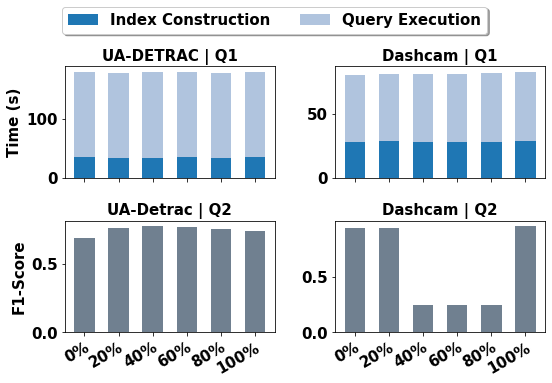

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=15)


x_axis_names = ['0%', '20%', '40%', '60%', '80%', '100%']

x = np.arange(len(x_axis_names))


### we need to do subplots
rows = 2
columns = 2
fig_size = (8, 5)
fig, axes = plt.subplots(rows, columns, sharey = False, sharex=True, figsize=fig_size)


i = 0
j = 0
width = 0.6

axes[i][j].bar(x_axis_names, jackson_ic, width, label='Index Construction')
axes[i][j].bar(x_axis_names, jackson_q, width, bottom = detrac_ic, label='Query Execution', color = 'lightsteelblue')
axes[i][j].set_ylabel('Time (s)', weight = 'bold', size = 15)
#axes[i][j].set_ylim(0, 200)
#axes[i][j].set_yticks([0, 50, 100, 150, 200])

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right',rotation_mode='anchor')
#plt.ylim(0, 2)
#plt.xticks(x, x_axis_names)
axes[i][j].set_title('UA-DETRAC | Q1', weight = 'bold', size = 15)


i = 0
j = 1

axes[i][j].bar(x_axis_names, dashcam_ic, width, label='Index Construction')
axes[i][j].bar(x_axis_names, dashcam_q, width, bottom = dashcam_ic, label='Query Execution', color = 'lightsteelblue')
axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')
#axes[i][j].set_ylabel('Time (s)', weight = 'bold', size = 15)
axes[i][j].set_title('Dashcam | Q1', weight = 'bold', size = 15)

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')


i = 1
j = 0

axes[i][j].bar(x_axis_names, jackson_f, width, label='F1-Score', color = 'slategray')
axes[i][j].set_title('UA-Detrac | Q2', weight = 'bold', size = 15)
axes[i][j].set_ylabel('F1-Score', weight = 'bold', size = 15)
axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')



i = 1
j = 1
axes[i][j].bar(x_axis_names, dashcam_f, width, label='F1-Score', color = 'slategray')

axes[i][j].set_title('Dashcam | Q2', weight = 'bold', size = 15)
#axes[i][j].set_ylabel('F1-Score', weight = 'bold', size = 15)

axes[i][j].set_xticklabels(x_axis_names, rotation = 30, ha = 'right', rotation_mode='anchor')




plt.tight_layout()

lgd = axes[0][0].legend(loc='upper center', bbox_to_anchor=(1, 1.6),
          fancybox=True, shadow=True, ncol=10)


#plt.legend()
plt.savefig('plots/rq4.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Old Graph

In [ ]:


index_construction_times = [1.00, 0.85, 1.04, 0.92, 0.93, 0.95]
t1 = [10.22, 10.44, 9.37, 9.55, 9.490, 9.01]
    


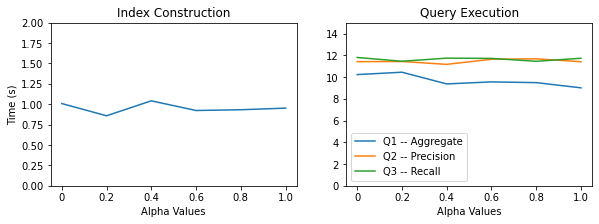

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x_axis_names = percentages

x = np.arange(len(x_axis_names))
width = 0.2


### we need to do subplots
rows = 1
columns = 3
i = 1
fig = plt.figure(figsize = (15,3))
fig.add_subplot(rows, columns, i)
plt.plot(ic_times)
plt.ylabel('Time (s)')
plt.xlabel('Alpha Values')
plt.ylim(0, 2)
plt.xticks(x, x_axis_names)
plt.title('Index Construction')





i = 2
fig.add_subplot(rows, columns, i)

plt.plot(t1, label = 'Q1 -- Aggregate')
plt.xticks(x, x_axis_names)
plt.title('Query Execution')
plt.ylim(0, 15)
plt.xlabel('Alpha Values')

plt.legend()
plt.show()



In [49]:
model_name = 'yolov5s'
model = torch.hub.load('ultralytics/yolov5', model_name, pretrained=True)
model

Using cache found in /nethome/jbang36/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-2 torch 1.10.2 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [50]:
images.shape

(100000, 540, 960, 3)

In [53]:
!pip install torchviz

     |################################| 47 kB 2.5 MB/s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=f8e9d4fc59b8d3ff673d73d1701a25e1dc785bb69113aee8251032c8647da242
  Stored in directory: /home/jbang36/.cache/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz
